DATA INGESTION
-Downloading data from github repos and store all files into repository data

In [1]:
import frontmatter

sample = """---
title: Blockchain Test
tags: [web3, smart-contract]
---
This is the content
"""

post = frontmatter.loads(sample)
print(post.metadata)
print(post.content)


{'title': 'Blockchain Test', 'tags': ['web3', 'smart-contract']}
This is the content


In [2]:
import io
import zipfile
import requests
import frontmatter

In [3]:
url = 'https://codeload.github.com/Bloceducare/Web3bridge-Web3-Cohort-XIII/zip/refs/heads/main'
resp = requests.get(url)

In [4]:
def read_repo_data(repo_owner, repo_name):
    """
    Download and parse all markdown files from a GitHub repository.
    
    Args:
        repo_owner: GitHub username or organization
        repo_name: Repository name
    
    Returns:
        List of dictionaries containing file content and metadata
    """
    prefix = 'https://codeload.github.com' 
    url = f'{prefix}/{repo_owner}/{repo_name}/zip/refs/heads/main'
    resp = requests.get(url)
    
    if resp.status_code != 200:
        raise Exception(f"Failed to download repository: {resp.status_code}")

    repository_data = []
    zf = zipfile.ZipFile(io.BytesIO(resp.content))
    
    for file_info in zf.infolist():
        filename = file_info.filename
        filename_lower = filename.lower()

        if not (filename_lower.endswith('.md') 
            or filename_lower.endswith('.mdx')):
            continue
    
        try:
            with zf.open(file_info) as f_in:
                content = f_in.read().decode('utf-8', errors='ignore')
                post = frontmatter.loads(content)
                data = post.to_dict()
                data['filename'] = filename
                repository_data.append(data)
        except Exception as e:
            print(f"Error processing {filename}: {e}")
            continue
    
    zf.close()
    return repository_data

In [5]:
web3_docs = read_repo_data('Bloceducare', 'Web3bridge-Web3-Cohort-XIII')

print(f"Documents found: {len(web3_docs)}")

Documents found: 254


In [6]:
print(web3_docs[0])

{'content': '# Web3bridge Web3 Cohort XIII - GitHub Contribution Guide\n\nWelcome to the Web3Bridge Cohort XIII training program! This repository is used for submitting tasks, tracking student progress, and grading assessments. Follow this guide to ensure a smooth contribution process.\n\n--- \n\n## For Students: Submitting Your Tasks\n\n### 1. Fork the Repository\n\nCreate a personal copy of this repository on your GitHub account.\n\n- Visit the repository page: [Web3bridge-Web3-Cohort-XIII](https://github.com/Bloceducare/Web3bridge-Web3-Cohort-XIII)\n- Click the "Fork" button at the top right of the page.\n\n### 2. Clone Your Forked Repository\n\nDownload your forked repository to your local machine:\n\n```bash\ngit clone https://github.com/<your_username>/Web3bridge-Web3-Cohort-XIII\ncd Web3bridge-Web3-Cohort-XIII\n```\n\n### 3. Sync Your Repository Regularly\n\nKeep your fork updated with the latest changes from the main repository:\n\n```bash\ngit remote add upstream https://githu

CHUNKING AND INTELLIGENT PROCESSING FOR DATA

In [7]:
#apply simple chunking using sliding window method
def sliding_window(seq, size, step):
    if size <= 0 or step <= 0:
        raise ValueError("size and step must be positive")

    n = len(seq)
    result = []
    for i in range(0, n, step):
        chunk = seq[i:i+size]
        result.append({'start': i, 'chunk': chunk})
        if i + size >= n:
            break

    return result


In [8]:
doc = web3_docs[0]

# Then pass its 'content' to sliding_window
chunks = sliding_window(doc["content"], size=2000, step=1000)

# Preview results
print("Number of chunks created:", len(chunks))
print("First chunk preview:\n", chunks[0]["chunk"][:500])

Number of chunks created: 4
First chunk preview:
 # Web3bridge Web3 Cohort XIII - GitHub Contribution Guide

Welcome to the Web3Bridge Cohort XIII training program! This repository is used for submitting tasks, tracking student progress, and grading assessments. Follow this guide to ensure a smooth contribution process.

--- 

## For Students: Submitting Your Tasks

### 1. Fork the Repository

Create a personal copy of this repository on your GitHub account.

- Visit the repository page: [Web3bridge-Web3-Cohort-XIII](https://github.com/Bloceduc


In [9]:
web3_chunks = []

for doc in web3_docs:
    doc_copy = doc.copy()
    doc_content = doc_copy.pop('content')  # remove big text to keep metadata
    chunks = sliding_window(doc_content, 2000, 1000)
    for chunk in chunks:
        chunk.update(doc_copy) 
    web3_chunks.extend(chunks)

print("Total chunks created:", len(web3_chunks))

Total chunks created: 400


In [10]:
#splitting by paragraphs
import re

if len(web3_docs) > 0:
    text = web3_docs[0]['content']
    paragraphs = re.split(r"\n\s*\n", text.strip())
    print(f"Document 0 has {len(paragraphs)} paragraphs")
    print(f"First paragraph: {paragraphs[0][:200]}...")
else:
    print("Document 0 not available")

Document 0 has 50 paragraphs
First paragraph: # Web3bridge Web3 Cohort XIII - GitHub Contribution Guide...


In [11]:
#splitting by headers
import re

def split_markdown_by_level(text, level=2):
    """
    Split markdown text by a specific header level.
    
    :param text: Markdown text as a string
    :param level: Header level to split on
    :return: List of sections as strings
    """
    header_pattern = r'^(#{' + str(level) + r'} )(.+)$'
    pattern = re.compile(header_pattern, re.MULTILINE)

    parts = pattern.split(text)
    
    sections = []
    for i in range(1, len(parts), 3):
        header = parts[i] + parts[i+1]  # "## " + "Title"
        header = header.strip()

        content = ""
        if i+2 < len(parts):
            content = parts[i+2].strip()

        if content:
            section = f'{header}\n\n{content}'
        else:
            section = header
        sections.append(section)
    
    return sections


In [12]:
web3_chunk = []

for doc in web3_docs:
    doc_copy = doc.copy()
    doc_content = doc_copy.pop('content')  # remove content for section splitting
    sections = split_markdown_by_level(doc_content, level=2)  # split by ## headers
    for section in sections:
        section_doc = doc_copy.copy()
        section_doc['section'] = section
        web3_chunk.append(section_doc)

print("Total sections created:", len(web3_chunk))
print("Preview first section:\n", web3_chunk[0]['section'][:500])


Total sections created: 337
Preview first section:
 ## For Students: Submitting Your Tasks

### 1. Fork the Repository

Create a personal copy of this repository on your GitHub account.

- Visit the repository page: [Web3bridge-Web3-Cohort-XIII](https://github.com/Bloceducare/Web3bridge-Web3-Cohort-XIII)
- Click the "Fork" button at the top right of the page.

### 2. Clone Your Forked Repository

Download your forked repository to your local machine:

```bash
git clone https://github.com/<your_username>/Web3bridge-Web3-Cohort-XIII
cd Web3bridge-W


In [13]:
print(web3_docs[0].keys())
print(web3_chunks[0].keys())

dict_keys(['content', 'filename'])
dict_keys(['start', 'chunk', 'filename'])


ADD SEARCH

In [14]:
#Text search
from minsearch import Index

index = Index(
    text_fields=["start", "chunk", "filename"],
    keyword_fields=[]
)

index.fit(web3_chunk)

query = "What are the stages in the pre-qualification phase?"
results = index.search(query)
print(results)

[{'filename': 'Web3bridge-Web3-Cohort-XIII-main/online-program/submissions/week-3/day-5/Ifeoluwa-Sanni/Inheritance-in-Solidity.md', 'section': '## Multiple Inheritance\n\nUnlike some programming languages like Java, Solidity allows for multiple inheritance. Multiple inheritance refers to the ability of a derived contract to inherit data and methods from more than one parent contract. In other words, one child contract can have multiple parents.\n\n```solidity\ncontract A { /* ... */ }\ncontract B { /* ... */ }\ncontract C is A, B {\n    // Contract C inherits from both A and B\n}\n```'}, {'filename': 'Web3bridge-Web3-Cohort-XIII-main/online-program/submissions/week-3/day-5/Ifeoluwa-Sanni/Inheritance-in-Solidity.md', 'section': '## Basic Inheritance Syntax\n\nYou can spot a child contract and identify its parent contract by looking for the `is` keyword.\n\n```solidity\ncontract A {\n    string constant A_NAME = "A";\n    \n    function getName() public view returns (string memory) {\n  

In [15]:
#Vector search
from sentence_transformers import SentenceTransformer
from minsearch import VectorSearch
import numpy as np

embedding_model = SentenceTransformer("multi-qa-distilbert-cos-v1")

web3_embeddings = []
for d in web3_chunks:
    text = d["chunk"]   
    v = embedding_model.encode(text)
    web3_embeddings.append(v)

web3_embeddings = np.array(web3_embeddings)

web3_vindex = VectorSearch()
web3_vindex.fit(web3_embeddings, web3_chunks)



In [16]:
query = "How to write my first smart contract"
q = embedding_model.encode(query)
results = web3_vindex.search(q)

print(results[:3])

[{'start': 0, 'chunk': '## Practice writing smart contract\n\nJust a simple practice project, enjoy!\n\n### Objectives\n\n- Write a multi signature smart contract\n- Ensure you cannot make transfer until at least 3 of the users agree\n- test with hardhat\n- Make it a factory.\n- Enjoy 😂\n\n### Submission Deadline\n\n**Friday: 5am**', 'filename': 'Web3bridge-Web3-Cohort-XIII-main/onsite-program/tasks/week-5/day-4.md'}, {'start': 0, 'chunk': "# 📚 Solidity Handbook - Class Discussion Guide\n\n> A comprehensive guide to learning Solidity for smart contract development on Ethereum\n\n## 🎯 Overview\n\nThis handbook covers **Solidity** - the main programming language for writing smart contracts on Ethereum and other EVM-compatible blockchains. It's designed following the **80/20 principle** - covering 20% of concepts that handle 80% of real-world needs.\n\n## 🎓 Key Learning Objectives\n\nBy the end of this guide, you should understand:\n\n- ✅ What Solidity is and how it works\n- ✅ How to writ

In [17]:
#hybrid search
def text_search(query):
    return index.search(query, num_results=5)

def vector_search(query):
    q = embedding_model.encode(query)
    return web3_vindex.search(q, num_results=5)

def hybrid_search(query):
    text_results = text_search(query)
    vector_results = vector_search(query)

    seen_ids = set()
    combined_results = []

    for result in text_results + vector_results:
        if result['filename'] not in seen_ids:
            seen_ids.add(result['filename'])
            combined_results.append(result)
    
    return combined_results


In [18]:
query = "What tools are required for the program?"
results = hybrid_search(query)

print(results[:3])

[{'filename': 'Web3bridge-Web3-Cohort-XIII-main/onsite-program/tasks/week-5/day-5.md', 'section': '## F\n\n### Objective'}, {'filename': 'Web3bridge-Web3-Cohort-XIII-main/onsite-program/tasks/week-5/day-4.md', 'section': '## Practice writing smart contract\n\nJust a simple practice project, enjoy!\n\n### Objectives\n\n- Write a multi signature smart contract\n- Ensure you cannot make transfer until at least 3 of the users agree\n- test with hardhat\n- Make it a factory.\n- Enjoy 😂\n\n### Submission Deadline\n\n**Friday: 5am**'}, {'filename': 'Web3bridge-Web3-Cohort-XIII-main/onsite-program/submissions/week-3/day-3/README.md', 'section': '## 🔑 3. Internal\n\n- *Functions & Variables:* Accessible within the contract and from derived (child) contracts. Not accessible externally.\n\n*Example:*\nsolidity\nuint internal data;\n\nfunction updateData(uint _val) internal {\n    data = _val;\n}\n```\n\n---'}]


AGENT AND TOOLS

In [19]:
#define hybrid search
from typing import List, Any

def hybrid_search_tool(query: str) -> List[Any]:
    """
    Perform a hybrid search combining text-based and vector-based search.

    Args:
        query (str): The search query string.

    Returns:
        List[Any]: A list of up to 5–10 combined and deduplicated search results
                   from both text and vector searches.
    """
    return hybrid_search(query)


In [20]:
#system prompt
system_prompt = """
You are a helpful assistant trained on the Web3Bridge Cohort XIII repository.

Use the hybrid search tool to find the most relevant information before answering.

Always search before answering. 
If the search returns results, summarize them clearly and cite the filename where the answer came from.
If nothing relevant is found, politely say you couldn't find it in the repository.

Never make up information not found in the repo.
"""

In [21]:
from dotenv import load_dotenv
import os

load_dotenv() 

groq_api_key = os.getenv("GROQ_API_KEY")

print("Groq key loaded successfully!" if groq_api_key else "Key not found.")

Groq key loaded successfully!


In [22]:
#creating agent
from pydantic_ai import Agent

agent = Agent(
    name="web3bridge_agent",
    system_prompt=system_prompt,
    tools=[hybrid_search_tool], 
    model="groq:llama-3.1-8b-instant"
)

In [23]:
question = "What tools are required for the program?"
result = await agent.run(user_prompt=question)
print(result.data)

Based on the search results, it appears that the tools required for the Web3Bridge Cohort XIII program are not explicitly stated. However, the search results provide information on the submission guidelines, mentor checklist, and task management. To find the required tools, I would recommend searching for files that contain keywords such as "requirements," "objectives," or "tooling." Unfortunately, the provided search results did not yield any relevant information on the required tools.


In [24]:
question = "How to write my first smart contract?"
result = await agent.run(user_prompt=question)
print(result.data)

To write your first smart contract, you can follow the example provided in the Solidity Handbook. Here's a simplified example of a smart contract that demonstrates the basic concepts:

```solidity
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.0;

contract MyFirstContract {
    // State variable to store the balance
    uint public balance;

    // Function to increment the balance
    function increment() public {
        balance += 1;
    }

    // Function to decrement the balance
    function decrement() public {
        balance -= 1;
    }

    // Function to get the current balance
    function getBalance() public view returns (uint) {
        return balance;
    }
}
```

This smart contract has a state variable `balance` to store the current balance, and three functions: `increment` to increase the balance, `decrement` to decrease the balance, and `getBalance` to retrieve the current balance. The `view` keyword in the `getBalance` function indicates that it does not modify

In [25]:
question = "What are the stages in the pre-qualification phase?"
result = await agent.run(user_prompt=question)
print(result.data)

The stages in the pre-qualification phase are:

1. Forking the repository on GitHub.
2. Cloning the forked repository to a local machine.
3. Syncing the local repository with the main repository regularly.
4. Navigating to the correct submission folder in the "submissions" directory.
5. Creating a personal folder using their registered name and project name.
6. Adding task files and ensuring proper documentation and organization.
7. Committing and pushing the changes to the forked repository.
8. Creating a pull request on the original repository.
9. Waiting for review and feedback from mentors.

Note that these stages are based on the information found in the README.md file of the Web3Bridge Cohort XIII repository and may not be a comprehensive list of all the stages involved in the pre-qualification phase.


EVALUATION

In [26]:
#logging
from pydantic_ai.messages import ModelMessagesTypeAdapter


def log_entry(agent, messages, source="user"):
    if hasattr(agent, "tools"):
        tools = [t.__name__ if hasattr(t, "__name__") else str(t) for t in agent.tools]
    elif hasattr(agent, "_tools"):
        tools = list(agent._tools.keys())
    else:
        tools = []

    dict_messages = ModelMessagesTypeAdapter.dump_python(messages)

    return {
        "agent_name": agent.name,
        "system_prompt": agent.system_prompt,
        "provider": agent.model.system,
        "model": agent.model.model_name,
        "tools": tools,
        "messages": dict_messages,
        "source": source
    }

In [27]:
import json
import secrets
from pathlib import Path
from datetime import datetime


LOG_DIR = Path('logs')
LOG_DIR.mkdir(exist_ok=True)


def serializer(obj):
    from datetime import datetime

    if isinstance(obj, datetime):
        return obj.isoformat()
    # Convert any other non-serializable object to a string
    return str(obj)


def log_interaction_to_file(agent, messages, source='user'):
    entry = log_entry(agent, messages, source)

    ts = entry['messages'][-1]['timestamp']
    ts_str = ts.strftime("%Y%m%d_%H%M%S")
    rand_hex = secrets.token_hex(3)

    filename = f"{agent.name}_{ts_str}_{rand_hex}.json"
    filepath = LOG_DIR / filename

    with filepath.open("w", encoding="utf-8") as f_out:
        json.dump(entry, f_out, indent=2, default=serializer)

    return filepath

In [28]:
question = input("Ask the Agent: How to write my first smart contract?")
result = await agent.run(user_prompt=question)
print(result.data)
log_interaction_to_file(agent, result.new_messages())

Ask the Agent: How to write my first smart contract? 


To submit your tasks in the Web3Bridge Cohort XIII program, follow these steps:

1. **Fork the Repository**: Create a personal copy of the repository on your GitHub account by clicking the "Fork" button. Then, clone the repository to your local machine using the command: `git clone https://github.com/<your_username>/Web3bridge-Web3-Cohort-XIII`.

2. **Navigate to the Submission Folder**: Navigate to the appropriate folder for the week and day, e.g., `submissions/week-<week_number>/day-<day_number>/`.

3. **Create a Personal Folder**: Create a folder using your registered name and project name, e.g., `mkdir <your_name>-<project_name>`.

4. **Add Your Task Files**: Place your task files inside your folder, ensuring proper documentation and organization.

5. **Commit and Push Your Changes**: Save your changes and push them to your forked repository using the command: `git add .`, `git commit -m "<message>"`, and `git push origin main`.

6. **Create a Pull Request**: Go to the original Git

WindowsPath('logs/web3bridge_agent_20251017_131254_897070.json')

In [29]:
#Adding references
system_prompt = """
You are a helpful AI assistant trained on the Web3Bridge Cohort XIII program materials.  

Your job is to help learners understand and navigate the course by answering questions about:
- Week tasks and objectives  
- Smart contract coding assignments  
- Required tools, frameworks, and libraries  
- Deadlines, submissions, and setup instructions  

Use the **hybrid search tool** to find relevant information from the course materials before answering any question.  

If you find relevant content:
1. Use it to give a clear and concise answer.
2. Always include references by citing the **filename** of the source material you used.
3. Replace "Web3bridge-Web3-Cohort-XIII-main" in the filename with the full GitHub link:  
   `https://github.com/YOUR_USERNAME/Web3bridge-Web3-Cohort-XIII-main/blob/main/`
4. Format the reference as a clickable markdown link:  
   `[LINK TITLE](FULL_GITHUB_LINK)`

If no relevant content is found:
- Let the user know that nothing specific was found.
- Then provide general guidance or best practices related to Web3, Solidity, or smart contract development.

Example of reference format:
> For more details, check [week-5/day-4.md](https://github.com/YOUR_USERNAME/Web3bridge-Web3-Cohort-XIII-main/blob/main/onsite-program/tasks/week-5/day-4.md)

Stay factual, cite your sources, and make your answers easy to understand.
""".strip()

In [30]:
agent = Agent(
    name="web3bridge_agent_v2",
    system_prompt=system_prompt,
    tools=[hybrid_search_tool],
    model="groq:llama-3.1-8b-instant" 
)

In [31]:
question = "What tools are required for the program?"
result = await agent.run(user_prompt=question)
print(result.data)

Based on the hybrid search results, it appears that the required tools for the Web3Bridge Cohort XIII program include:

* A web browser for navigating the GitHub repository and accessing the course materials.
* A text editor or IDE for writing and editing code.
* Git and GitHub for version control and collaborative development.
* A local development environment, such as Hardhat, for testing and deploying smart contracts.

For specific tools and frameworks, it is recommended to refer to the [README.md](https://github.com/YOUR_USERNAME/Web3bridge-Web3-Cohort-XIII-main/blob/main/README.md) file and the [Mentor Checklist](https://github.com/YOUR_USERNAME/Web3bridge-Web3-Cohort-XIII-main/blob/main/online-program/mentors/mentor-checklist.md) document for a comprehensive list of required tools and resources.

Please note that the program materials may assume a certain level of proficiency with these tools, so it's essential to familiarize yourself with them before starting the program.

For m

In [32]:
question = "How do I set up a local blockchain using Hardhat Network?"
result = await agent.run(user_prompt=question)
print(result.data)

To set up a local blockchain using Hardhat Network, you can follow these steps:

1. Install the required dependencies by running `npm install`.
2. Compile your contracts by running `npx hardhat compile`.
3. Run the Hardhat Network by running `npx hardhat node`.
4. You can deploy your contracts to the local blockchain by using the `hardhat-deploy` plugin. For example, you can deploy a contract by running `npx hardhat deploy --network localhost`.

Please note that you will need to modify the `hardhat.config.js` file to point to your local blockchain. This file is typically located in the root of your project.

Here is an example of how to set up a local blockchain using Hardhat Network:

```bash
// hardhat.config.js
module.exports = {
  solidity: '0.8.4',
  networks: {
    hardhat: {
      url: 'http://localhost:8545',
      accounts: {
        count: 10
      }
    }
  }
};
```

This configuration will set up a local Ethereum node on port 8545 and create 10 accounts for you to use.

You

In [33]:
#Evaluation Agent: LLM as Judge
evaluation_prompt = """
Use this checklist to evaluate the quality of an AI agent's answer (<ANSWER>) to a user question (<QUESTION>).
We also include the entire log (<LOG>) for analysis.

For each item, check if the condition is met. 

Checklist:

- instructions_follow: The agent followed the user's instructions (in <INSTRUCTIONS>)
- instructions_avoid: The agent avoided doing things it was told not to do  
- answer_relevant: The response directly addresses the user's question  
- answer_clear: The answer is clear and correct  
- answer_citations: The response includes proper citations or sources when required  
- completeness: The response is complete and covers all key aspects of the request
- tool_call_search: Is the search tool invoked? 

Output true/false for each check and provide a short explanation for your judgment.
""".strip()

In [34]:
class EvalAgent:
    def __init__(self, name, model, system_prompt):
        self.name = name
        self.model = model
        self.system_prompt = system_prompt

    async def run(self, user_prompt):
        response = client.chat.completions.create(
            model=self.model,
            messages=[
                {"role": "system", "content": self.system_prompt},
                {"role": "user", "content": user_prompt}
            ]
        )
        return response.choices[0].message.content

In [35]:
#Judge AI
eval_agent = Agent(
    name='eval_agent',
    model='groq:moonshotai/kimi-k2-instruct-0905',
    system_prompt=evaluation_prompt,
)

In [36]:
#input format
user_prompt_format = """
<INSTRUCTIONS>{instructions}</INSTRUCTIONS>
<QUESTION>{question}</QUESTION>
<ANSWER>{answer}</ANSWER>
<LOG>{log}</LOG>
""".strip()

In [37]:
def load_log_file(log_file):
    with open(log_file, 'r') as f_in:
        log_data = json.load(f_in)
        log_data['log_file'] = log_file
        return log_data

In [38]:
os.listdir("./logs")

['web3bridge_agent_20251016_132520_c4ad07.json',
 'web3bridge_agent_20251016_132749_44cf28.json',
 'web3bridge_agent_20251016_132829_98680e.json',
 'web3bridge_agent_20251016_132914_963829.json',
 'web3bridge_agent_20251016_192357_f91184.json',
 'web3bridge_agent_20251017_131254_897070.json',
 'web3bridge_agent_v2_20251016_192512_552dec.json',
 'web3bridge_agent_v2_20251016_193911_f774ee.json',
 'web3bridge_agent_v2_20251016_193940_f49656.json',
 'web3bridge_agent_v2_20251016_194020_5c6b10.json',
 'web3bridge_agent_v2_20251016_194102_dfbeca.json',
 'web3bridge_agent_v2_20251016_194111_ee57fb.json',
 'web3bridge_agent_v2_20251016_195703_4332f6.json',
 'web3bridge_agent_v2_20251016_195719_888080.json',
 'web3bridge_agent_v2_20251016_195755_27c2e9.json',
 'web3bridge_agent_v2_20251016_195838_45a066.json',
 'web3bridge_agent_v2_20251016_195912_f267df.json',
 'web3bridge_agent_v2_20251016_195950_9bbcad.json',
 'web3bridge_agent_v2_20251016_200016_1d7490.json',
 'web3bridge_agent_v2_20251016

In [39]:
log_record = load_log_file('./logs/web3bridge_agent_20251016_132914_963829.json')

instructions = log_record['system_prompt']
question = log_record['messages'][0]['parts'][0]['content']
answer = log_record['messages'][-1]['parts'][0]['content']
log = json.dumps(log_record['messages'])

user_prompt = user_prompt_format.format(
    instructions=instructions,
    question=question,
    answer=answer,
    log=log
)

In [40]:
result = await eval_agent.run(user_prompt)

print(result.data)

- **instructions_follow**: **False**  
  The instructions require the agent to *search before answering*, and while a search was performed, the actual answer does **not** summarize the search results or cite the correct filenames where the information came from. Instead, it reformats the search results into a generic step-by-step guide and lists filenames that were **not** the primary source of the instructions (e.g., `tasks/week-5/day-5.md` and `tasks/week-5/day-4.md` contain unrelated content).

- **instructions_avoid**: **True**  
  The agent did not invent information; it only used content returned by the search tool.

- **answer_relevant**: **False**  
  The user never asked “how to submit tasks”; they only gave the agent its own instructions. The agent answered an **unasked** question.

- **answer_clear**: **False**  
  The response is clear in itself, but it is **not** the correct answer to the user’s prompt (which was simply the agent’s own instructions).

- **answer_citations*

In [41]:
#simplify log message
def simplify_log_messages(messages):
    log_simplified = []

    for m in messages:
        parts = []
        for original_part in m['parts']:
            part = original_part.copy()
            kind = part.get('part_kind', '')

            # Clean unnecessary fields
            part.pop('timestamp', None)
            part.pop('id', None)
            part.pop('tool_call_id', None)
            part.pop('metadata', None)

            if kind == 'tool-return':
                part['content'] = 'RETURN_RESULTS_REDACTED'

            parts.append(part)

        message = {'kind': m['kind'], 'parts': parts}
        log_simplified.append(message)

    return log_simplified


In [42]:
async def evaluate_log_record(eval_agent, log_record):
    messages = log_record['messages']

    instructions = log_record['system_prompt']
    question = messages[0]['parts'][0]['content']
    answer = messages[-1]['parts'][0]['content']

    log_simplified = simplify_log_messages(messages)
    log = json.dumps(log_simplified, indent=2)

    user_prompt = user_prompt_format.format(
        instructions=instructions,
        question=question,
        answer=answer,
        log=log
    )

    result = await eval_agent.run(user_prompt)
    return result

In [43]:
log_record = load_log_file('./logs/web3bridge_agent_20251016_132914_963829.json')
eval1 = await evaluate_log_record(eval_agent, log_record)
print(eval1)

AgentRunResult(data="- instructions_follow: true - The agent followed the instruction to use the hybrid search tool before answering\n- instructions_avoid: true - The agent did not make up information and cited sources\n- answer_relevant: false - The response does not address the user's implicit question about how to find information in the repository; instead it provides instructions on how to contribute/submit tasks\n- answer_clear: false - The answer is unclear because it provides submission workflow steps rather than explaining how to search for or locate information within the repository\n- answer_citations: true - The response includes citations to specific files in the repository\n- completeness: false - The response is incomplete as it doesn't explain how to actually find or search for information within the repository contents\n- tool_call_search: true - The hybrid search tool was invoked as required")


DATA GENERATION

In [58]:
#Testing our agent, we need lot of realistic questions
from pydantic import BaseModel
question_generation_prompt = """
You are helping to create realistic test questions for an AI assistant designed to help new applicants preparing for the next Web3Bridge Cohort (Cohort XIV and beyond).

Based on the provided materials, generate natural, varied questions that future participants might ask before or during the program.

The questions should:
- Sound like they’re coming from people interested in joining the program
- Include questions about requirements, expectations, and preparation
- Cover both technical topics (blockchain, Solidity, web3 tools) and general logistics (timeline, registration, mentorship, projects)
- Range from beginner-friendly to moderately advanced

Generate one question for each record.
""".strip()

class QuestionsList(BaseModel):
    questions: list[str]

question_generator = Agent(
    name="question_generator",
    system_prompt=question_generation_prompt,
    model='groq:llama-3.1-8b-instant',
    tools=[]
)

In [67]:
#sample 10 record, using groq so i have to do in batches
import random

MAX_RECORDS = 3
BATCH_SIZE = 2  

questions_all = []
records_to_use = random.sample(web3_docs, min(MAX_RECORDS, len(web3_docs)))

for i in range(0, len(records_to_use), BATCH_SIZE):
    batch = records_to_use[i:i+BATCH_SIZE]
    prompt_docs = [d.get('content', d.get('chunk', ''))[:300] for d in batch]
    prompt = json.dumps(prompt_docs)

    print(f"\n Generating questions for batch {i//BATCH_SIZE + 1}...")
    try:
        result = await question_generator.run(prompt)
        response = result.data

        # Parse output safely
        try:
            data = json.loads(response)
            batch_questions = data.get("questions", [])
        except:
            batch_questions = [
                q.strip("-• ").strip()
                for q in response.split("\n")
                if q.strip()
            ]

        questions_all.extend(batch_questions)
        print(f" Got {len(batch_questions)} questions.")
    except Exception as e:
        print(f" Error in batch {i//BATCH_SIZE + 1}: {e}")
        continue

print("\n All question generation complete.")
print(f"Total questions generated: {len(questions_all)}")



 Generating questions for batch 1...
 Got 6 questions.

 Generating questions for batch 2...
 Got 1 questions.

 All question generation complete.
Total questions generated: 7


In [68]:
from tqdm.auto import tqdm

for q in tqdm(questions_all):
    #print(q)

    result = await agent.run(user_prompt=q)
    #print(result.data)

    log_interaction_to_file(
        agent,
        result.new_messages(),
        source='ai-generated'
    )

  0%|          | 0/7 [00:00<?, ?it/s]

In [70]:
#Evaluate our logs
eval_set = []

for log_file in LOG_DIR.glob('*.json'):
    if "web3bridge_agent_v2" not in log_file.name:
        continue

    log_record = load_log_file(log_file)
    if log_record['source'] != 'ai-generated':
        continue

    eval_set.append(log_record)

In [72]:
eval_results = []

for log_record in tqdm(eval_set):
    eval_result = await evaluate_log_record(eval_agent, log_record)
    eval_results.append((log_record, eval_result))

  0%|          | 0/115 [00:00<?, ?it/s]

In [87]:
#reading our data

rows = []

for log_record, eval_result in eval_results:
    messages = log_record["messages"]

    row = {
        "file": str(log_record["log_file"]),
        "question": messages[0]["parts"][0]["content"],
        "answer": messages[-1]["parts"][0]["content"],
    }

    pattern = r"- (\w+): (true|false)"
    matches = re.findall(pattern, eval_result.data.lower())

    for check_name, check_value in matches:
        row[check_name] = 1 if check_value == "true" else 0

    rows.append(row)

In [88]:
import pandas as pd

df_evals = pd.DataFrame(rows)

In [89]:
print(df_evals.mean(numeric_only=True))

instructions_follow    0.771429
instructions_avoid     1.000000
answer_relevant        0.857143
answer_clear           0.842857
answer_citations       0.642857
completeness           0.714286
tool_call_search       0.971429
dtype: float64


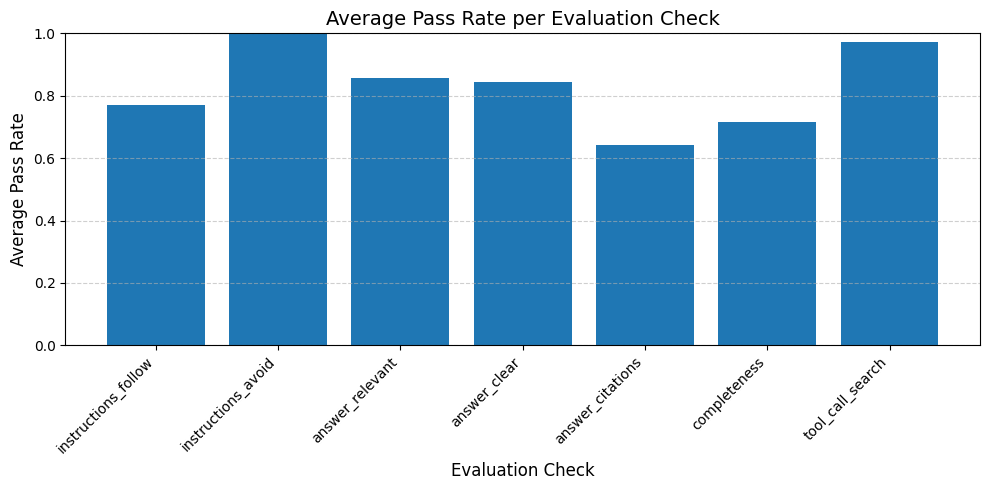

In [92]:
#plotting
import matplotlib.pyplot as plt

avg_scores = df_evals.mean(numeric_only=True)

plt.figure(figsize=(10, 5))
plt.bar(avg_scores.index, avg_scores.values)

# Add labels and formatting
plt.title("Average Pass Rate per Evaluation Check", fontsize=14)
plt.xlabel("Evaluation Check", fontsize=12)
plt.ylabel("Average Pass Rate", fontsize=12)
plt.ylim(0, 1) 
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the chart
plt.tight_layout()
plt.show()

In [93]:
#calculate Hitrate and MRR
def evaluate_search_quality(search_function, test_queries):
    results = []
    
    for query, expected_docs in test_queries:
        search_results = search_function(query, num_results=5)
        
        # Calculate hit rate
        relevant_found = any(doc['filename'] in expected_docs for doc in search_results)
        
        # Calculate MRR
        for i, doc in enumerate(search_results):
            if doc['filename'] in expected_docs:
                mrr = 1 / (i + 1)
                break
        else:
            mrr = 0
            
        results.append({
            'query': query,
            'hit': relevant_found,
            'mrr': mrr
        })
    return results

In [107]:
test_queries = [
    (
        "what is a smart contract",
        [
            "Web3bridge-Web3-Cohort-XIII-main/onsite-program/tasks/week-6/smart-contract-week-task-1.md",
            "Web3bridge-Web3-Cohort-XIII-main/online-program/tasks/week-6/smart-contract-week-task-1.md"
        ]
    ),
    (
        "what is the purpose of web3bridge",
        [
            "Web3bridge-Web3-Cohort-XIII-main/README.md",
            "Web3bridge-Web3-Cohort-XIII-main/docs/mission.md"
        ]
    ),
]

In [108]:
def hybrid_search_function(query, num_results=5):
    results = hybrid_search_tool(query)
    return results[:num_results] 

In [109]:
results = evaluate_search_quality(hybrid_search_function, test_queries)

import pandas as pd
df = pd.DataFrame(results)

print(df)
print("\n Average Hit Rate:", df["hit"].mean())
print(" Average MRR:", df["mrr"].mean())

                               query   hit  mrr
0           what is a smart contract  True  1.0
1  what is the purpose of web3bridge  True  0.5

 Average Hit Rate: 1.0
 Average MRR: 0.75


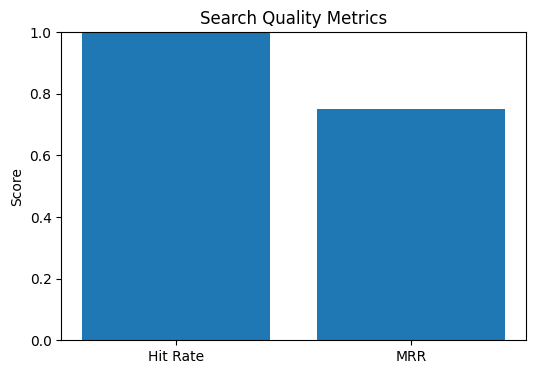

In [110]:
plt.figure(figsize=(6,4))
plt.bar(["Hit Rate", "MRR"], [df["hit"].mean(), df["mrr"].mean()])
plt.title("Search Quality Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()